In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, AdaBoostClassifier, VotingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.datasets.samples_generator import make_blobs
from sklearn.metrics import confusion_matrix,accuracy_score, classification_report, f1_score, precision_recall_curve
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.linear_model import SGDClassifier
from sklearn.datasets import make_classification
from sklearn.metrics import roc_curve, roc_auc_score,auc
from sklearn.feature_selection import VarianceThreshold,mutual_info_classif,mutual_info_regression
import matplotlib.pyplot as plt
from sklearn.feature_selection import SelectFromModel,SelectKBest,SelectPercentile
from sklearn import preprocessing 
from sklearn.preprocessing import MinMaxScaler 



In [2]:
fullFileName='twitter.csv'
data=pd.read_csv(fullFileName, sep=' ')

data_=data.replace(['1:','2:','3:','4:','5:','6:','7:','8:','9:','10:','11:','12:','13:','14:','15:','16:','17:','18:','19:',
                   '20:','21:','22:','23:','24:','25:','25:','27:','28:','29:','30:','31:','32:','33:','34:','35:','36:','37:','38:','39:','40:','50:','60:'],'',regex=True).astype(float) 

data_.columns = ['user_class','Number of followers per followees','Fraction of tweets replied','Fraction of tweets with spam words',
'Fraction of tweets with URLs','Existence of spam words in the screen name','Number of hashtags_mean',
'Number of hashtags_median','Number of hashtags_min','Number of hashtage_max',
'Number of URLs _mean','Number of URLs _median','Number of URLs _min','Number of URLs _max',
'Number of characters per tweet_mean','Number of characters per tweet_median','Number of characters per tweet_min','Number of characters per tweet_max',
'Number of hashtags per tweet_mean','Number of hashtags per tweet_median','Number of hashtags per tweet_min','Number of hashtags per tweet_max',
'Number of mentions per tweet_mean','Number of mentions per tweet_median','Number of mentions per tweet_min','Number of mentions per tweet_max',
'Number of numeric characters per tweet_mean','Number of numeric characters per tweet_median','Number of numeric characters per tweet_min','Number of numeric characters per tweet_max',
'Number of URLs on each tweet_mean','Number of URLs on each tweet_median','Number of URLs on each tweet_min','Number of URLs on each tweet_max',
'Number of words per tweet_mean','Number of words per tweet_median','Number of words per tweet_min','Number of words per tweet_max',
'number of times the tweet has been retweeted_mean','number of times the tweet has been retweeted_median','number of times the tweet has been retweeted_min','number of times the tweet has been retweeted_max',
'Number of followees','Number of followers','Number of tweets','Nnumber of followees of a user’s followers','Number of times mentioned',
'Number of times the user was replied','Number of times the user replied','Number of tweets of a user’s followees','Time between posts_mean','Time between posts_median',
'Time between posts_min','Time between posts_max','Number of posted tweets per day_mean','Number of posted tweets per day_median','Number of posted tweets per day_min',
'Number of posted tweets per day_max','Number of posted tweets per day_mean','Number of posted tweets per day_median','Number of posted tweets per day_min','Number of posted tweets per day_max','Age of the user account']


In [3]:
data_.isnull().sum(axis=0)

user_class                                0
Number of followers per followees         0
Fraction of tweets replied                0
Fraction of tweets with spam words        0
Fraction of tweets with URLs              0
                                         ..
Number of posted tweets per day_mean      0
Number of posted tweets per day_median    0
Number of posted tweets per day_min       0
Number of posted tweets per day_max       0
Age of the user account                   0
Length: 63, dtype: int64

In [4]:
#first we count the number of missing values in each row in pandas dataframe
print("Dataset Lenght:: ",len(data_))
print("Dataset shape:: ", data_.shape)

Dataset Lenght::  1064
Dataset shape::  (1064, 63)


In [5]:
print("Dataset:: ")
data_.head()
data_.info()
data_.describe()

Dataset:: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1064 entries, 0 to 1063
Data columns (total 63 columns):
user_class                                             1064 non-null float64
Number of followers per followees                      1064 non-null float64
Fraction of tweets replied                             1064 non-null float64
Fraction of tweets with spam words                     1064 non-null float64
Fraction of tweets with URLs                           1064 non-null float64
Existence of spam words in the screen name             1064 non-null float64
Number of hashtags_mean                                1064 non-null float64
Number of hashtags_median                              1064 non-null float64
Number of hashtags_min                                 1064 non-null float64
Number of hashtage_max                                 1064 non-null float64
Number of URLs _mean                                   1064 non-null float64
Number of URLs _median             

,user_class,Number of followers per followees,Fraction of tweets replied,Fraction of tweets with spam words,Fraction of tweets with URLs,Existence of spam words in the screen name,Number of hashtags_mean,Number of hashtags_median,Number of hashtags_min,Number of hashtage_max,...,Time between posts_max,Number of posted tweets per day_mean,Number of posted tweets per day_median,Number of posted tweets per day_min,Number of posted tweets per day_max,Number of posted tweets per day_mean,Number of posted tweets per day_median,Number of posted tweets per day_min,Number of posted tweets per day_max,Age of the user account
count,1064.000000,1064.000000,1064.000000,1064.000000,1064.000000,1064.000000,1064.000000,1064.000000,1064.000000,1064.000000,...,1.064000e+03,1064.000000,1064.000000,1064.000000,1064.000000,1064.000000,1064.000000,1064.000000,1064.000000,1.064000e+03
mean,1.333647,1.275642,0.229468,0.134967,0.413622,0.003759,0.030917,0.035823,0.010807,0.403525,...,5.070877e+07,199.379297,201.963346,99.631579,969.672932,1017.616637,983.703947,11.556391,3338.031955,4.493992e+08
std,0.471737,6.157445,0.212837,0.339470,0.357267,0.061227,0.046346,0.093575,0.041792,0.309248,...,1.131179e+08,477.707017,545.202549,366.903110,1573.957048,1709.653059,2284.329363,38.588460,7254.172127,2.596845e+08
min,1.000000,0.000000,0.000000,0.000000,0.005457,0.000000,0.000000,0.000000,0.000000,0.000000,...,5.000000e+01,50.012900,50.000000,50.000000,51.000000,50.090200,50.000000,0.000000,61.000000,6.273771e+07
25%,1.000000,0.313268,0.006253,0.000000,0.112835,0.000000,0.003700,0.000000,0.000000,0.166700,...,5.281914e+06,51.000000,50.000000,50.000000,59.000000,55.997975,51.000000,0.000000,622.000000,6.758591e+07
50%,1.000000,0.739994,0.191407,0.000000,0.268197,0.000000,0.010700,0.000000,0.000000,0.272700,...,5.823160e+06,53.093900,51.000000,50.000000,525.000000,520.147300,513.000000,1.000000,657.000000,6.152921e+08
75%,2.000000,1.100000,0.384394,0.002291,0.738952,0.000000,0.039750,0.000000,0.000000,0.500000,...,5.256034e+07,59.053850,58.000000,50.000000,551.000000,556.253800,550.000000,5.000000,6146.000000,6.220431e+08
max,2.000000,166.020833,1.000000,1.000000,1.000000,1.000000,0.388500,1.000000,0.375000,1.000000,...,5.606784e+08,5373.000000,5373.000000,5373.000000,5573.000000,5951.000000,51170.000000,732.000000,62870.000000,6.911490e+08


In [6]:
array=data_.values
X1 = array[:,1: ] 
Y = array[:,0]
 
""" MIN MAX SCALER """
min_max_scaler = preprocessing.MinMaxScaler(feature_range =(0, 1)) 
# Scaled feature 
X2 = min_max_scaler.fit_transform(X1) 

  
""" Standardisation """ 
Standardisation = preprocessing.StandardScaler() 
# Scaled feature 
X = Standardisation.fit_transform(X2) 

#Spliting Dataset into Test and Train
X_train, X_test, y_train, y_test=train_test_split(X,Y,test_size=0.2, random_state=0)
#Applying Standard scaling to get optimized result



In [7]:
###remove constant,
constant_filter=VarianceThreshold(threshold=0.01)
constant_filter.fit(X_train)
X_train_filter=constant_filter.transform(X_train)
X_test_filter=constant_filter.transform(X_test)

In [8]:
##duplicate features
X_train_T=X_train_filter.T
X_test_T=X_test_filter.T

In [9]:
X_train_T=pd.DataFrame(X_train_T)
X_test_T=pd.DataFrame(X_test_T)

In [10]:
X_train_T.duplicated().sum()

0

In [11]:
####we have duplicate features here
duplicated_features=X_train_T.duplicated()

In [12]:
features_to_keep=[not index for index in duplicated_features]

In [13]:
X_train_unique=X_train_T[features_to_keep].T
X_test_unique=X_test_T[features_to_keep].T

In [14]:
X_train_unique.shape,X_test_unique.shape

((851, 62), (213, 62))

In [15]:
###calculate the MI
mi=mutual_info_classif(X_train_unique, y_train)

In [16]:
len(mi)

62

In [17]:
mi

array([0.21523404, 0.22337219, 0.1978141 , 0.26744702, 0.01177831,
       0.22453294, 0.07758044, 0.05271351, 0.0794483 , 0.23693225,
       0.13445153, 0.2071349 , 0.12261724, 0.09604699, 0.10913155,
       0.20733387, 0.17668144, 0.21509643, 0.07409963, 0.07523819,
       0.06485772, 0.20841078, 0.06876537, 0.        , 0.20614428,
       0.16613123, 0.06112882, 0.16769798, 0.02552365, 0.25083217,
       0.12803018, 0.19006525, 0.05340052, 0.14423327, 0.03422941,
       0.18492392, 0.19205397, 0.11656569, 0.        , 0.        ,
       0.12876886, 0.2259168 , 0.22654055, 0.17232612, 0.21517285,
       0.20064149, 0.2131109 , 0.22076525, 0.2117681 , 0.18089733,
       0.18040728, 0.14919512, 0.21808661, 0.1800878 , 0.04844084,
       0.13477342, 0.11727924, 0.14835343, 0.04650147, 0.07638999,
       0.10824028, 0.2391205 ])

In [18]:
mi=pd.Series(mi)
mi.index=X_train_unique.columns

In [19]:
mi.sort_values(ascending=False, inplace=True)

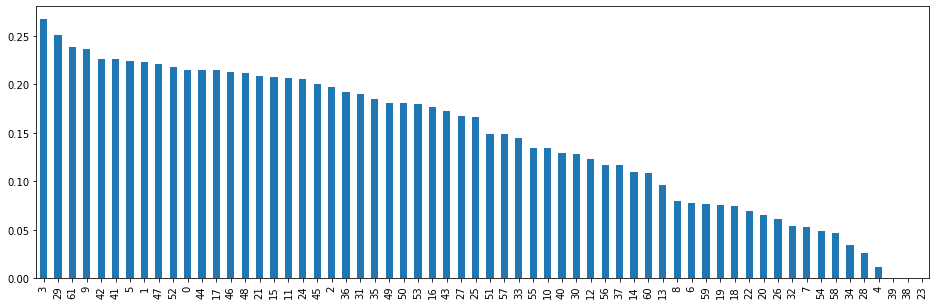

In [20]:
mi.plot.bar(figsize=(16,5))

In [21]:
#we select 10 percentage of features k=10
sel=SelectPercentile(mutual_info_classif,percentile=16).fit(X_train_unique,y_train)
X_train_unique.columns[sel.get_support()]

Int64Index([1, 3, 5, 9, 29, 41, 42, 47, 52, 61], dtype='int64')

In [22]:
len(X_train_unique.columns[sel.get_support()])

10

In [23]:
X_train_mi=sel.transform(X_train_unique)
X_test_mi=sel.transform(X_test_unique)

In [24]:
X_train_mi.shape

(851, 10)

In [25]:
###build the model and compare the performance

In [26]:
#calculate TP, TN,FN,FP
def compute_tp_tn_fn_fp(actual_y, predicted_y):
    #we define spam class(2) as positive rate, and not spam class(1) as negative rate
    #True positive _ actual =2, predicted=2
    #False positive _ actual=2, predicted=1
    #False negative _ actual=1, predicted=2
    #True negative _ actual=1, predicted=1
    tp=sum((actual_y == 2) & (predicted_y == 2))
    tn=sum((actual_y == 1) & (predicted_y == 1))
    fn=sum((actual_y == 1) & (predicted_y == 2))
    fp=sum((actual_y == 2) & (predicted_y == 1))
    return tp, tn, fp, fn

#calculate accuracy
def compute_accuracy(tp,tn,fn,fp):
    #Acurracy=TP+TN/FP+FN+TP+TN
    return((tp+tn*100)/float(tp+tn+fn+fp) if (tp+tn+fn+fp) != 0 else 0)

#calculate precission
def compute_precision(tp,fp):
    #Acurracy=TP/FP+TP
      return((tp*100)/float(tp+fp) if (tp+fp) != 0 else 0)
    
#calculate recall
def compute_recall(tp,fn):
     #recall=TP/FN+TP
        return ((tp*100)/float(tp+fn) if (tp+fn) != 0 else 0)
    
#calculate f1_score
def compute_f1_score(actual_y, predicted_y):
        tp,tn,fp,fn= compute_tp_tn_fn_fp(actual_y, predicted_y)
        precision=compute_precision(tp,fp)/100 
        recall=compute_recall(tp,fn)/100
        f1_score=(2*precision*recall)/(precision+recall) if (precision+recall) != 0 else 0
        return f1_score

def performance_of_the_model(actual_y,predicted_y):    
    tp_r,tn_r, fp_r,fn_r=compute_tp_tn_fn_fp(actual_y,predicted_y)
    print('TP for dt is:',tp_r)
    print('TN for dt is:',tn_r)
    print('FP for dt is:',fp_r)
    print('FN for dt is:',fn_r)
    accuracy=compute_accuracy(tp_r,tn_r,fn_r,fp_r)
    print('accuracy:', accuracy)
    precision=compute_precision(tp_r,fp_r)
    print('precision:', precision)
    recall=compute_recall(tp_r,fn_r)
    print('recall:', recall)
    f1_score=compute_f1_score(actual_y,predicted_y)
    print('f1_score:', f1_score)
    return
    

In [27]:
#Decision Tree Classifier
#Function to perform training with Entropy
dt=DecisionTreeClassifier(criterion="entropy", random_state=0, max_depth=2)
dt.fit(X_train_mi, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=2,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=0, splitter='best')

In [28]:
# Function to make prediction
y_pred_en=dt.predict(X_test_mi)
#checking performance of the model
print(confusion_matrix(y_test, y_pred_en))
print(classification_report(y_test, y_pred_en))
performance_of_the_model(y_test, y_pred_en)  



[[133   9]
 [ 19  52]]
              precision    recall  f1-score   support

         1.0       0.88      0.94      0.90       142
         2.0       0.85      0.73      0.79        71

    accuracy                           0.87       213
   macro avg       0.86      0.83      0.85       213
weighted avg       0.87      0.87      0.87       213

TP for dt is: 52
TN for dt is: 133
FP for dt is: 19
FN for dt is: 9
accuracy: 62.68544600938967
precision: 73.2394366197183
recall: 85.24590163934427
f1_score: 0.7878787878787877


In [29]:
#Random Forest Classifier
rfc=RandomForestClassifier(max_depth=2, random_state=0)
rfc.fit(X_train_mi, y_train)
predictionRF=rfc.predict(X_test_mi)
#checking performance of the model
print(confusion_matrix(y_test, predictionRF))
print(classification_report(y_test, predictionRF))
performance_of_the_model(y_test, predictionRF) 

[[138   4]
 [ 14  57]]
              precision    recall  f1-score   support

         1.0       0.91      0.97      0.94       142
         2.0       0.93      0.80      0.86        71

    accuracy                           0.92       213
   macro avg       0.92      0.89      0.90       213
weighted avg       0.92      0.92      0.91       213

TP for dt is: 57
TN for dt is: 138
FP for dt is: 14
FN for dt is: 4
accuracy: 65.05633802816901
precision: 80.28169014084507
recall: 93.44262295081967
f1_score: 0.8636363636363635


C:\Users\SARA\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [30]:
#define K
import math
math.sqrt(len(y_test))

14.594519519326424

In [31]:
#K-NN classifier
knn=KNeighborsClassifier(n_neighbors=13, p=2, metric='euclidean')

#predict the test set results
knn.fit(X_train_mi, y_train)
predictionKNN=knn.predict(X_test_mi)
#Evaluate model
print(confusion_matrix(y_test, predictionKNN))
print(classification_report(y_test, predictionKNN))
performance_of_the_model(y_test, predictionKNN)

[[136   6]
 [ 17  54]]
              precision    recall  f1-score   support

         1.0       0.89      0.96      0.92       142
         2.0       0.90      0.76      0.82        71

    accuracy                           0.89       213
   macro avg       0.89      0.86      0.87       213
weighted avg       0.89      0.89      0.89       213

TP for dt is: 54
TN for dt is: 136
FP for dt is: 17
FN for dt is: 6
accuracy: 64.10328638497653
precision: 76.05633802816901
recall: 90.0
f1_score: 0.8244274809160305


In [32]:
# svm Classifier
clf=svm.SVC(kernel="linear", C=0.8,probability=True)
clf.fit(X_train_mi,y_train)
predictionSVM=clf.predict(X_test_mi)

#Evaluate model
print(confusion_matrix(y_test, predictionSVM))
print(classification_report(y_test, predictionSVM))
performance_of_the_model(y_test, predictionSVM)

[[134   8]
 [ 17  54]]
              precision    recall  f1-score   support

         1.0       0.89      0.94      0.91       142
         2.0       0.87      0.76      0.81        71

    accuracy                           0.88       213
   macro avg       0.88      0.85      0.86       213
weighted avg       0.88      0.88      0.88       213

TP for dt is: 54
TN for dt is: 134
FP for dt is: 17
FN for dt is: 8
accuracy: 63.16431924882629
precision: 76.05633802816901
recall: 87.09677419354838
f1_score: 0.8120300751879699


In [33]:
#Bagging Classifier
bg=BaggingClassifier(DecisionTreeClassifier(), max_samples=0.5, max_features=1.0, n_estimators=10)
bg=BaggingClassifier()
bg.fit(X_train_mi,y_train)
predictionbg=bg.predict(X_test_mi)

#Evaluate model
print(confusion_matrix(y_test, predictionbg))
print(classification_report(y_test, predictionbg))
performance_of_the_model(y_test, predictionbg)

[[129  13]
 [ 16  55]]
              precision    recall  f1-score   support

         1.0       0.89      0.91      0.90       142
         2.0       0.81      0.77      0.79        71

    accuracy                           0.86       213
   macro avg       0.85      0.84      0.85       213
weighted avg       0.86      0.86      0.86       213

TP for dt is: 55
TN for dt is: 129
FP for dt is: 16
FN for dt is: 13
accuracy: 60.821596244131456
precision: 77.46478873239437
recall: 80.88235294117646
f1_score: 0.7913669064748201


In [34]:
#Boosting Classifier- Ada Boost
adb=AdaBoostClassifier(DecisionTreeClassifier(), n_estimators=10, learning_rate=1)
adb.fit(X_train_mi,y_train)
predictionadb=adb.predict(X_test_mi)

#Evaluate model
print(confusion_matrix(y_test, predictionadb))
print(classification_report(y_test, predictionadb))
performance_of_the_model(y_test, predictionadb)

[[125  17]
 [ 16  55]]
              precision    recall  f1-score   support

         1.0       0.89      0.88      0.88       142
         2.0       0.76      0.77      0.77        71

    accuracy                           0.85       213
   macro avg       0.83      0.83      0.83       213
weighted avg       0.85      0.85      0.85       213

TP for dt is: 55
TN for dt is: 125
FP for dt is: 16
FN for dt is: 17
accuracy: 58.943661971830984
precision: 77.46478873239437
recall: 76.38888888888889
f1_score: 0.7692307692307692


In [35]:
#Naive bayse Classifier
nb=GaussianNB()
nb.fit(X_train_mi,y_train)
predictionnb=nb.predict(X_test_mi)

#Evaluate model
print(confusion_matrix(y_test, predictionnb))
print(classification_report(y_test, predictionnb))
performance_of_the_model(y_test, predictionnb)

[[123  19]
 [ 10  61]]
              precision    recall  f1-score   support

         1.0       0.92      0.87      0.89       142
         2.0       0.76      0.86      0.81        71

    accuracy                           0.86       213
   macro avg       0.84      0.86      0.85       213
weighted avg       0.87      0.86      0.87       213

TP for dt is: 61
TN for dt is: 123
FP for dt is: 10
FN for dt is: 19
accuracy: 58.032863849765256
precision: 85.91549295774648
recall: 76.25
f1_score: 0.8079470198675496


In [39]:
#creat Multilayer neural network Classifier
nn=MLPClassifier(solver='lbfgs', alpha=1e-5,hidden_layer_sizes=(5, 2), random_state=1)
nn.fit(X_train_mi,y_train)
predictionNN=nn.predict(X_test_mi)

#Evaluate model
print(confusion_matrix(y_test, predictionNN))
print(classification_report(y_test, predictionNN))
performance_of_the_model(y_test, predictionNN)



[[140   2]
 [ 33  38]]
              precision    recall  f1-score   support

         1.0       0.81      0.99      0.89       142
         2.0       0.95      0.54      0.68        71

    accuracy                           0.84       213
   macro avg       0.88      0.76      0.79       213
weighted avg       0.86      0.84      0.82       213

TP for dt is: 38
TN for dt is: 140
FP for dt is: 33
FN for dt is: 2
accuracy: 65.90610328638498
precision: 53.521126760563384
recall: 95.0
f1_score: 0.6846846846846847


In [40]:
#Voting Classifier- Multiple Model Ensemble
evc=VotingClassifier(estimators=[('dt',dt),('rfc',rfc),('clf',clf),('knn',knn),('bg',bg),('adb',adb),('nb',nb),('nn',nn)], voting='soft')
evc.fit(X_train_mi,y_train)
predictionevc=evc.predict(X_test_mi)

#Evaluate model
print(confusion_matrix(y_test, predictionevc))
print(classification_report(y_test, predictionevc))
performance_of_the_model(y_test, predictionevc)

[[136   6]
 [ 13  58]]
              precision    recall  f1-score   support

         1.0       0.91      0.96      0.93       142
         2.0       0.91      0.82      0.86        71

    accuracy                           0.91       213
   macro avg       0.91      0.89      0.90       213
weighted avg       0.91      0.91      0.91       213

TP for dt is: 58
TN for dt is: 136
FP for dt is: 13
FN for dt is: 6
accuracy: 64.12206572769954
precision: 81.69014084507042
recall: 90.625
f1_score: 0.8592592592592593


In [41]:
#defining learning classifiers
names=["Decision_Tree", "Random_Forest", "linear_SVM","Nearest_Neighbors","Bagging","AdaBoost","Naive_Bayes","Neural_Net","Vothing_classifier"]
classifiers = [dt,rfc,clf,knn,bg,adb,nb,nn,evc]

#Build Model, Apply Model on Test Data & Record Accuracy Scores
scores = []
Fmeasure=[]
for name, clf in zip(names, classifiers):
    clf.fit(X_train_mi, y_train)
    prediction=clf.predict(X_test_mi)
    scores.append(compute_tp_tn_fn_fp(y_test, prediction))
    f1_score=compute_f1_score(y_test,prediction)
    Fmeasure.append(f1_score)
    

In [42]:
scores

[(52, 133, 19, 9),
 (57, 138, 14, 4),
 (54, 134, 17, 8),
 (54, 136, 17, 6),
 (56, 132, 15, 10),
 (55, 125, 16, 17),
 (61, 123, 10, 19),
 (38, 140, 33, 2),
 (56, 135, 15, 7)]

In [43]:
tp=[i[0] for i in scores]

In [44]:
tp

[52, 57, 54, 54, 56, 55, 61, 38, 56]

In [45]:
fp=[i[2] for i in scores]

In [46]:
fp

[19, 14, 17, 17, 15, 16, 10, 33, 15]

In [47]:
Fmeasure

[0.7878787878787877,
 0.8636363636363635,
 0.8120300751879699,
 0.8244274809160305,
 0.8175182481751824,
 0.7692307692307692,
 0.8079470198675496,
 0.6846846846846847,
 0.835820895522388]

In [49]:

#define Prediction probabilities
r_probs_ = [0 for _ in range(len(y_test))]
dt_probs = dt.predict_proba(X_test_mi)
rfc_probs = rfc.predict_proba(X_test_mi)
clf_probs = clf.predict_proba(X_test_mi)
knn_probs = knn.predict_proba(X_test_mi)
bg_probs = bg.predict_proba(X_test_mi)
adb_probs = adb.predict_proba(X_test_mi)
nb_probs = nb.predict_proba(X_test_mi)
nn_probs = nn.predict_proba(X_test_mi)
evc_probs = evc.predict_proba(X_test_mi)

#Probabilities for the positive outcome is kept
dt_probs_ = dt_probs[:,1]
rfc_probs_ = rfc_probs[:,1]
clf_probs_ = clf_probs[:,1]
knn_probs_ = knn_probs[:,1]
bg_probs_ = bg_probs[:,1]
adb_probs_ = adb_probs[:,1]
nb_probs_ = nb_probs[:,1]
nn_probs_ = nn_probs[:,1]
evc_probs_ = evc_probs[:,1]
#ROC is the receiver operating characteristic AUROC is the area under the ROC curve
result=[]
r_auc = roc_auc_score(y_test, r_probs_)
dt_auc = roc_auc_score(y_test, dt_probs_)
result.append(dt_auc)
rfc_auc = roc_auc_score(y_test, rfc_probs_)
result.append(rfc_auc)
clf_auc = roc_auc_score(y_test, clf_probs_)
result.append(clf_auc)
knn_auc = roc_auc_score(y_test, knn_probs_)
result.append(knn_auc)
bg_auc = roc_auc_score(y_test, bg_probs_)
result.append(bg_auc)
adb_auc = roc_auc_score(y_test, adb_probs_)
result.append(adb_auc)
nb_auc = roc_auc_score(y_test, nb_probs_)
result.append(nb_auc)
nn_auc = roc_auc_score(y_test, nn_probs_)
result.append(nn_auc)
evc_auc = roc_auc_score(y_test, evc_probs_)
result.append(evc_auc)

#Print AUROC scores
print('Random (chance) Prediction: AUROC = %.3f' % (r_auc))
print('Decision_Tree: AUROC = %.3f' % (dt_auc))
print('Random_Forest: AUROC = %.3f' % (rfc_auc))
print('linear_SVM: AUROC = %.3f' % (clf_auc))
print('Nearest_Neighbors: AUROC = %.3f' % (knn_auc))
print('Bagging: AUROC = %.3f' % (bg_auc))
print('AdaBoost: AUROC = %.3f' % (adb_auc))
print('Naive Bayes: AUROC = %.3f' % (nb_auc))
print('Neural_Net: AUROC = %.3f' % (nn_auc))
print('Vothing_classifier: AUROC = %.3f' % (evc_auc))

#Calculate ROC curve
r_fpr, r_tpr, threshold = roc_curve(y_test, r_probs_,pos_label=1,drop_intermediate=True)
dt_fpr, dt_tpr, threshold = roc_curve(y_test, dt_probs_,pos_label=1,drop_intermediate=True)
rfc_fpr, rfc_tpr, threshold = roc_curve(y_test, rfc_probs_,pos_label=1,drop_intermediate=True)
clf_fpr, clf_tpr, threshold= roc_curve(y_test, clf_probs_,pos_label=1,drop_intermediate=True)
knn_fpr, knn_tpr,threshold = roc_curve(y_test, knn_probs_,pos_label=1,drop_intermediate=True)
bg_fpr, bg_tpr, threshold= roc_curve(y_test, bg_probs_,pos_label=1,drop_intermediate=True)
adb_fpr, adb_tpr, threshold = roc_curve(y_test, adb_probs_,pos_label=1,drop_intermediate=True)
nb_fpr, nb_tpr, threshold = roc_curve(y_test, nb_probs_,pos_label=1,drop_intermediate=True)
nn_fpr, nb_tpr, threshold = roc_curve(y_test, nn_probs_,pos_label=1,drop_intermediate=True)
evc_fpr, evc_tpr, threshold= roc_curve(y_test, evc_probs_,pos_label=1,drop_intermediate=True)


# #Plot the ROC curve
# plt.plot(r_fpr, r_tpr, linestyle='--', label='Random prediction (AUROC = %0.3f)' % r_auc)
# plt.plot(dt_fpr, dt_tpr, marker='.', label='Random Forest (AUROC = %0.3f)' % dt_auc)
# plt.plot(rfc_fpr, rfc_tpr, marker='.', label='Naive Bayes (AUROC = %0.3f)' % rfc_auc)
# plt.plot(clf_fpr, clf_tpr, marker='.', label='linear_SVM (AUROC = %0.3f)' % clf_auc)
# plt.plot(knn_fpr, knn_tpr, marker='.', label='Nearest_Neighbors(AUROC = %0.3f)' % knn_auc)
# plt.plot(bg_fpr, bg_tpr, marker='.', label='Bagging (AUROC = %0.3f)' % bg_auc)
# plt.plot(adb_fpr, adb_tpr, marker='.', label='AdaBoost (AUROC = %0.3f)' % adb_auc)
# plt.plot(nb_fpr, nb_tpr, marker='.', label='Naive_Bayes (AUROC = %0.3f)' % nb_auc)
# plt.plot(nn_fpr, nn_tpr, marker='.', label='Neural_Net (AUROC = %0.3f)' % nn_auc)
# plt.plot(evc_fpr, evc_tpr, marker='.', label='Vothing_classifier (AUROC = %0.3f)' % evc_auc)
# # Title
# plt.title('ROC Plot')
# plt.legend(loc = 'lower right')
# plt.plot([0, 1], [0, 1],'r--')
# plt.xlim([0, 1])
# plt.ylim([0, 1])
# plt.ylabel('True Positive Rate')
# plt.xlabel('False Positive Rate')
# plt.show()

Random (chance) Prediction: AUROC = 0.500
Decision_Tree: AUROC = 0.841
Random_Forest: AUROC = 0.905
linear_SVM: AUROC = 0.911
Nearest_Neighbors: AUROC = 0.915
Bagging: AUROC = 0.899
AdaBoost: AUROC = 0.827
Naive Bayes: AUROC = 0.895
Neural_Net: AUROC = 0.891
Vothing_classifier: AUROC = 0.911


In [50]:
result

[0.840954175758778,
 0.9046320174568537,
 0.911029557627455,
 0.9152449910731997,
 0.8989287839714343,
 0.8274647887323944,
 0.8948621305296568,
 0.8907458837532235,
 0.911029557627455]

In [56]:
#create data frame of model performance
df = pd.DataFrame()
df['Machine Learning algorithms'] = names
df['F-measure-Twitter-IG'] = Fmeasure 
df['TP-Twitter-IG']=tp
df['FP-Twitter-IG']=fp
df['AUC-Twitter-IG']=result

In [57]:
#adding colors to the data frame
cm = sns.light_palette("#8E4585", as_cmap=True)
s = df.style.background_gradient(cmap=cm)
s

,Machine Learning algorithms,F-measure-Twitter-IG,TP-Twitter-IG,FP-Twitter-IG,AUC-Twitter-IG
0,Decision_Tree,0.787879,52,19,0.840954
1,Random_Forest,0.863636,57,14,0.904632
2,linear_SVM,0.81203,54,17,0.91103
3,Nearest_Neighbors,0.824427,54,17,0.915245
4,Bagging,0.817518,56,15,0.898929
5,AdaBoost,0.769231,55,16,0.827465
6,Naive_Bayes,0.807947,61,10,0.894862
7,Neural_Net,0.684685,38,33,0.890746
8,Vothing_classifier,0.835821,56,15,0.91103
